## Air Quality Prediction (Feature Impact)

Given data collected from *air quality sensors*, let's try to predict the **air quality** in a given room.

We will use a random forest regression model to make our predictions. 

Source: https://www.kaggle.com/datasets/saurabhshahane/adl-classification

### Getting Started

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

In [3]:
data = pd.read_csv('dataset.csv', names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])
data

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MQ1     1845 non-null   int64
 1   MQ2     1845 non-null   int64
 2   MQ3     1845 non-null   int64
 3   MQ4     1845 non-null   int64
 4   MQ5     1845 non-null   int64
 5   MQ6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


### Preprocessing

In [5]:
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and y
    y = df['CO2']
    X = df.drop('CO2', axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [7]:
X_train

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
1695,551,650,1285,1643,1150,2160
427,624,682,1105,1661,1644,2518
289,485,553,1044,1563,1180,2523
529,440,520,932,1460,1154,2398
1443,622,688,1185,1689,1401,2283
...,...,...,...,...,...,...
905,591,689,1132,1652,1398,2279
1791,368,471,987,1446,883,2279
1096,370,478,884,1478,980,2234
235,380,410,860,1416,936,2215


In [8]:
y_train

1695    2
427     4
289     2
529     1
1443    4
       ..
905     4
1791    1
1096    1
235     1
1061    2
Name: CO2, Length: 1291, dtype: int64

### Training

In [9]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [10]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 94.40%


### Feature Impact With SHAP Values

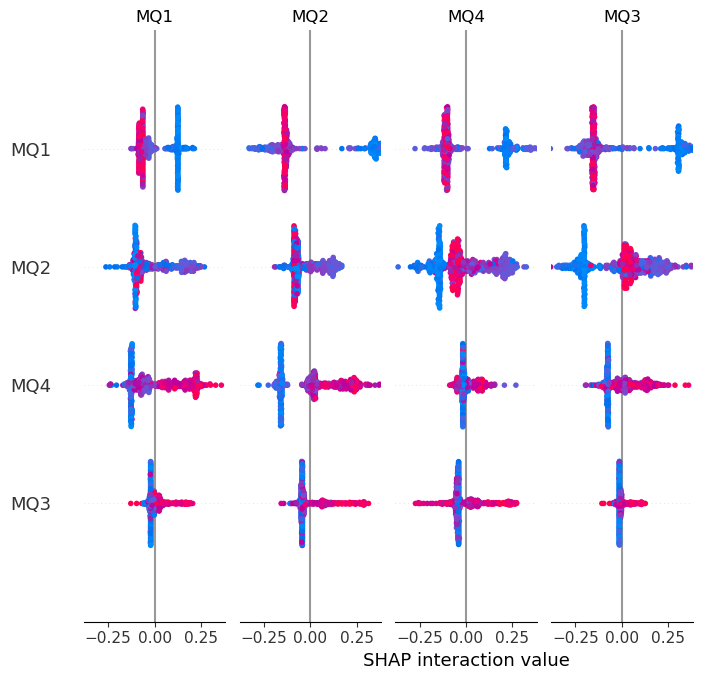

In [11]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=model.classes_)

In [12]:
shap_values.shape, X_test.shape

((554, 6, 4), (554, 6))

In [13]:
model.predict_proba(X_test)

array([[0.  , 0.09, 0.65, 0.26],
       [0.  , 0.58, 0.16, 0.26],
       [0.96, 0.03, 0.  , 0.01],
       ...,
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.97, 0.03],
       [0.12, 0.88, 0.  , 0.  ]])

In [25]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train.drop('MQ5', axis=1), y_train)
acc = model.score(X_test.drop('MQ5', axis=1), y_test)
print("Accuracy: {:.2f}%".format(acc*100))

RandomForestClassifier(random_state=1)

In [27]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train.drop('MQ6', axis=1), y_train)
acc = model.score(X_test.drop('MQ6', axis=1), y_test)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 93.68%
